### Крутая тема про сеточки

Начать полезно тут, попробуйте зафитить все датасеты.

https://playground.tensorflow.org/
    


In [28]:
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt

Генерим датасет и рисуем как он выглядит

In [29]:
x, y = make_moons(n_samples=200, noise = 0.2)

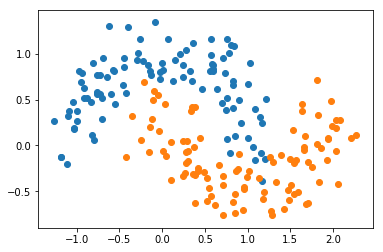

In [30]:
plt.scatter(x[:,0][y == 0], x[:,1][y == 0])
plt.scatter(x[:,0][y == 1], x[:,1][y == 1])

Сплитим пока на train\test

In [31]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y)

Создайте нейронную сеть используя MLPClassifier

Обратите внимание на следующие параметры:
- hidden_layer_sizes
- activation
- learning_rate ($ \alpha $)

По умолчанию MLPClassifier сам поймет какой тип выходной переменной и соответствено использует либо log_loss либо softmax_crossentropy. 

Так же по умолчанию MLPClassifier будет учиться до победного. Либо по train_loss, либо, если early_stopping = True, MLPClassifier автоматически выделит небольшой валидационный сет и будет учиться пока на нем не перестанет падать loss. Мы же чтобы посмотреть прогресс поставим параметры max_iter=1, warm_start=True. Тогда каждый раз при запуске fit будет прогоняться одна эпоха, и при следующем запуске fit веса сети будут сохраняться

In [38]:
nn = MLPClassifier( [10,10], max_iter=1000 )

In [32]:
nn = MLPClassifier( *YOUR CODE HERE* )

SyntaxError: invalid syntax (<ipython-input-32-e87e1b5d902d>, line 1)

Теперь запустите сеть на 1000 эпох используя цикл for. На каждом шаге посчитайте train и test loss. Постройте графики

In [35]:
train_losses = []
test_losses = []

In [ ]:
for i in range(1000):
    *YOUR CODE HERE* 

In [39]:
nn.fit(x_tr, y_tr)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10, 10], learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Для того чтобы подписать графики можно добавить plt.plot(....., label = 'название кривой'), и в конце написать plt.legend()

In [ ]:
*YOUR CODE HERE*

plt.legend()

## Теперь давайте проверим, что все понятно с умноженем матриц. 

Напоминаю, что слой в нейронной сети выглядит как умножение предыдущего на матрицу коэффициентов, которую мы настраиваем.

В логистической регрессии мы подразумевали, что мы умножаем входной вектор на матрицу, добавив во входной вектор единичку, чтобы добавить свободный член. $$ xw^T + b = [x, 1] \theta^T$$ , где $$ \theta = [w, b] $$

В нейрнонных сетях принятно явно разделять параметры на матрицу коэффициентов и свободный член. Т.е. переход от слоя к слою осуществляется так $$ x^{(k+1)} = x^{(k)}w_k^T + b_k $$ , где $k$ - номер слоя

Веса нейроной сети в sklearn можно вытащить с помощью nn.coefs_ и nn.intercept_, первое выдаст список матриц $W$, второе выдаст свободные члены (т.н. bias) $b$.

#### Задание

Создайте небольшую нейронную сеть с 2-мя слоями и relu активацией. Поставьте max_iter побольше и обучитесь на данных из первой части.

In [ ]:
nn = MLPClassifier( *YOUR CODE HERE* )

Теперь вытащите веса этой нейронной сети

In [ ]:
W_list = *YOUR CODE HERE*
b_list = *YOUR CODE HERE*

Создайте случайный массив 2хN, это будет массив для которого мы сначала предскажем результат сеткой, а затем попробуем посчитать руками

In [ ]:
test_input = *YOUR CODE HERE*

Теперь посчитаем предсказания сети

In [ ]:
test_nn_output = nn.predict_proba(test_input)

Наконец, посчитайте тоже самое вручную умножив матрицы весов на входной вектор используя np.dot и np.transpose. Не забудьте добавить свободные члены и нелинейности, а на конце сигмоиду. Должно получиться тоже самое.

$$ x^{(k+1)} = relu(x^{(k)}w_k^T + b_k)$$

$$ y = sigmoid(x^{(n)}) $$

In [58]:
def relu(x):
    return x[x > 0]

In [59]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### MNIST 

Когда сетка более менее заработала предлагаю, взять датасет с цифрами, и зарешать его одной сеткой. 

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("./data/train.csv")

x = data[data.columns[1:]].values
y = data[data.columns[0]].values


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_tr, x_te, y_tr, y_te = train_test_split(x)